In [11]:
##Code for Toluene
def cool(ref1,ref2,mf1,mf2,out,in1,valin1,in2,valin2):
    import CoolProp.CoolProp as CP
    from CoolProp.CoolProp import PropsSI
    if ref2==0:
        k='HEOS::'+ref1
        g=CP.PropsSI(out,in1,valin1,in2,valin2,k)
        return g
    else:
        a=ref1+'&'+ref2
        b=CP.AbstractState('HEOS',a);b.set_mass_fractions([mf1,mf2])
        c=b.get_mole_fractions()
        k='HEOS::'+ref1+'['+'{}'.format(c[0])+']&'+ref2+'['+'{}'.format(c[1])+']'
        g=CP.PropsSI(out,in1,valin1,in2,valin2,k)
        return g

mt 23.045947962680646
mw 42.0638054085617
hl [25976.42608298 24932.06689657 23876.65074403 22809.43563557
 21729.58283786 20636.13735925 19528.00291695 18403.90931354
 17262.36914843 16101.61917822 14919.53895511 13713.53471625
 12480.36803031 11215.89241354  9914.62752208  8569.02492752
  7168.08911309  5694.45816251  4116.98608634  2364.58757246]
     quality    yan et al  Akers et al     shaha  Han et al  Kuo et al
0         0.00   6.284420     4.542882  2.597643   2.201598   2.556867
1         0.05   8.516185     5.850658  2.459118   2.430951  22.171169
2         0.10  10.101189     6.743972  2.315903   2.570093  27.089252
3         0.15  11.380581     7.447878  2.172110   2.672010  30.194817
4         0.20  12.474101     8.039024  2.028479   2.753159  32.360662
5         0.25  13.439979     8.553965  1.885394   2.820937  33.906814
6         0.30  14.311578     9.013335  1.743118   2.879335  34.989544
7         0.35  15.110052     9.430062  1.601867   2.930766  35.696188
8         

<ipython-input-12-b3330bad1f3d>:116: RuntimeWarning: divide by zero encountered in true_divide
  Co=(((1-x)/x)**.8)*((dgc/dlc)**.5)


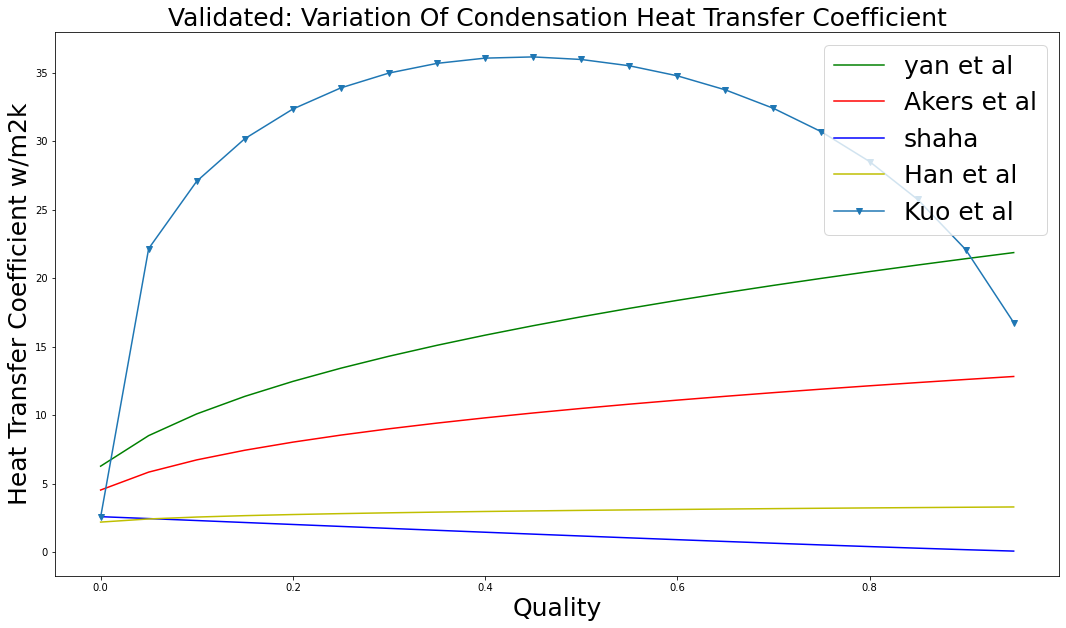

In [12]:
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from CoolProp.CoolProp import PropsSI
#input data
T1=543;T7=T8=463;P4=45000;T13=298;T11=T7+30;B=60;b=0.0022;pco=0.01325;we=0.55;g=9.81
#EXHAUST INPUTS
T9=587;mex=105.5;cex=1048.2;dex=0.59508;hex=593967;vex=.000030132;kex=0.045794
#MATERIAL PROPERTIES
t=0.0005;k=17
#COMMAN PARAMETER
X=(b*math.pi)/pco
si=(1/6)*(1+((1+X**2)**0.5)+4*(1+((X**2)/2))**0.5)
dh=(2*b)/si
deq=2*b
Gex=(mex)/(b*we)



#REQUIRED COMMAN PROPERTIES OF EVAPORATOR
cge=cool('Toluene',0,0,0,'C','T',T8,'Q',1)
cle=cool('Toluene',0,0,0,'C','T',T8,'Q',0)
kle=cool('Toluene',0,0,0,'L','T',T8,'Q',0)
kge=cool('Toluene',0,0,0,'L','T',T8,'Q',1)
vge=cool('Toluene',0,0,0,'V','T',T8,'Q',1)
vle=cool('Toluene',0,0,0,'V','T',T8,'Q',0)
prle=cool('Toluene',0,0,0,'Prandtl','T',T8,'Q',0)
prge=cool('Toluene',0,0,0,'Prandtl','T',T8,'Q',1)
dle=cool('Toluene',0,0,0,'D','T',T8,'Q',0)
dge=cool('Toluene',0,0,0,'D','T',T8,'Q',1)
s_tension=cool('Toluene',0,0,0,'I','T',T8,'Q',1)
hge=cool('Toluene',0,0,0,'H','T',T8,'Q',1)
hle=cool('Toluene',0,0,0,'H','T',T8,'Q',0)
LHE=hge-hle

#REQUIRED COMMAN PROPERTIES OF CONDENSER
cgc=cool('Toluene',0,0,0,'C','P',P4,'Q',1)
clc=cool('Toluene',0,0,0,'C','P',P4,'Q',0)
klc=cool('Toluene',0,0,0,'L','P',P4,'Q',0)
vgc=cool('Toluene',0,0,0,'V','P',P4,'Q',1)
vlc=cool('Toluene',0,0,0,'V','P',P4,'Q',0)
prlc=cool('Toluene',0,0,0,'Prandtl','P',P4,'Q',0)
dlc=cool('Toluene',0,0,0,'D','P',P4,'Q',0)
dgc=cool('Toluene',0,0,0,'D','P',P4,'Q',1)
hgc=cool('Toluene',0,0,0,'H','P',P4,'Q',1)
hlc=cool('Toluene',0,0,0,'H','P',P4,'Q',0)
LHC=hgc-hlc

#REQUIRED COMMAN PROPERTIES OF WATER
cw=cool('water',0,0,0,'C','P',101325,'T',T13)
kw=cool('water',0,0,0,'L','P',101325,'T',T13)
vw=cool('Toluene',0,0,0,'V','P',101325,'T',T13)
prw=cool('Toluene',0,0,0,'Prandtl','P',101325,'T',298)

#UNKNOWN TEMPRETURS ,PRESSURE & OTHER PROPERTIES
T4=cool('Toluene',0,0,0,'T','P',P4,'Q',0);T3=T4
T14=T3-10

P7=cool('Toluene',0,0,0,'P','T',T7,'Q',0)
S1=cool('Toluene',0,0,0,'S','T',T1,'P',P7)
S2=S1
P2=P4
T2=cool('Toluene',0,0,0,'T','S',S1,'P',P2)
win=(1/dlc)*(P7-P4)
h5=hlc+win
T5=cool('Toluene',0,0,0,'T','H',h5,'P',P7)
T6=T5+(cge/cle)*(T2-T3)


#mass flow rate of touelene
mt=(mex*cex*(T9-T11))/(cge*(T1-T8)+LHE)
print('mt',mt)
T12=T11-((mt*cle)/(mex*cex))*(T7-T6)
T10=((mt*LHE)/(mex*cex))+T11
#MASS FLOW RATE OF WATER
mw=(mt*LHC)/(cw*(T14-T13))
print('mw',mw)


#EQUIVALENT PROPERTIES FOR CONDENSER
x=0
for x in [np.arange(x,1,0.05)]:
    G=(mt)/(b*we)
    Geqc=G*((1-x)+x*((dlc/dgc)**0.5))
    Reeqc=(Geqc*dh)/vlc

#EQUIVALENT PROPERTIES OF EVAPORATER
    Geqe=G*((1-x)+x*((dle/dge)**0.5))
    Reeqe=(Geqe*dh)/vle

#CONDENSER HEAT TRANSFER COEFFICIENT CALCULATION
#1.yan et al
    hcon_Yan=(4.118*(klc/dh)*(Reeqc**0.4)*(prlc**0.333))*2.2/10000
    

#2.Akers et al
    hcon_Akers=(5.03*(klc/dh)*(Reeqc**0.333)*(prlc**0.333))*3/10000
    

#3.shaha 
    Rel=(G*dh*(1-x))/vlc
    hl=.023*(Rel**.8)*(prlc**.4)*(klc/dh)
    print('hl',hl)
    hcon_Shaha=(hl*(((1-x)**0.4)+((3.8*((x)**.76)*((1-x)**.04))/(P4**0.38))))/10000
    

#4.Han et al
    a=(math.pi)/180
    Ge1=11.22*((pco/dh)**-2.83)*(((pco/dh)-50*a)**-4.5)
    Ge2=0.35*((pco/dh)**0.23)*(((pco/dh)-50*a)**-1.48)
    hcond_Han=((Ge1*(klc/dh)*(Reeqc**Ge2)*prlc**0.333))*1
    
#5.Kuo et al 
    Co=(((1-x)/x)**.8)*((dgc/dlc)**.5)
    q=(mt*LHC)
    Bo=(q)/(G*LHC)
    Frlo=(G**2)/((dlc**2)*g*dh)
    hcond_Kuo=(0.2092*(klc/dh)*(Rel**0.78)*(prlc**0.333)*((klc/dh)**.14)*((0.25*(Co**-.45)*Frlo**0.25)+(75*(Bo**0.75))))*2/100000

    
    
    data={ ' quality  ': x,'yan et al':hcon_Yan,'Akers et al':hcon_Akers,'shaha':hcon_Shaha,'Han et al':hcond_Han,'Kuo et al':hcond_Kuo}
    df=pd.DataFrame(data=data)
    print(df)
    plt.figure(figsize=(18,10))
    plt.title('Validated: Variation Of Condensation Heat Transfer Coefficient',{'size':25})
    plt.xlabel('Quality',{'size':25})
    plt.ylabel('Heat Transfer Coefficient w/m2k',{'size':25})
    
    plt.plot(x,hcon_Yan,'g-',label='yan et al')
    plt.plot(x,hcon_Akers,'r-',label='Akers et al')
    plt.plot(x,hcon_Shaha,'b-',label='shaha')
    plt.plot(x,hcond_Han,'y-',label='Han et al')
    plt.plot(x,hcond_Kuo,'v-',label='Kuo et al')
    plt.legend(fontsize='25')

    print(Geqc)      






In [13]:
#AREA CALCULATION FOR CONDENSOR
#1. FIND HEAT TRANSFER COEFFICIENT FROM WATER SIDE
Gw=(mw)/(b*we)
Rew=(Gw*deq)/vw
h_water=(0.724*(kw/dh)*(((6*B)/math.pi)**0.646)*(Rew**0.583)*(prw**0.33))
print('h_water',h_water)

#2.Rate of Heat Transfer From Condenser
Q=mt*LHC
print('Q',Q)
#3.LMTD
LMTD=((T4-T13)-(T3-T14))/(math.log((T4-T13)/(T3-T14)))
print('LMTD',LMTD)
#4. OVERALL HEAT TRANSFER COEFFICIENT
U=((1/(hcon_Yan*22000))+(1/h_water)+0.00074)**-1
print('U',U)
#5.Area
A_cond=(Q)/(U*LMTD)
print('A_cond',A_cond)

h_water 6491318.96122219
Q 8698103.96895614
LMTD 27.742184534148425
U [1337.99500495 1341.39694923 1342.9056141  1343.81852875 1344.4511096
 1344.92462556 1345.29729533 1345.60111762 1345.85537595 1346.07249678
 1346.26090785 1346.42656011 1346.57379513 1346.70586706 1346.82527103
 1346.93395763 1347.03347744 1347.12508121 1347.20979086 1347.28845088]
A_cond [234.33083829 233.73654706 233.47395964 233.31535058 233.20557282
 233.12346669 233.0588876  233.00626541 232.96224598 232.92466928
 232.89207115 232.8634182  232.8379568  232.8151223  232.79448187
 232.77569726 232.75849962 232.74267217 232.72803781 232.71445023]


     quality    kim et al  han et al  don & condlikar     Amalfi
0         0.00   9.191395   1.688225        29.425982  13.579749
1         0.05  10.143311   2.042269        29.618556  13.579749
2         0.10  10.985504   2.382510        29.652460  13.579749
3         0.15  11.746809   2.711773        29.675058  13.579749
4         0.20  12.445427   3.031969        29.692624  13.579749
5         0.25  13.093692   3.344474        29.707340  13.579749
6         0.30  13.700412   3.650325        29.720259  13.579749
7         0.35  14.272125   3.950323        29.731991  13.579749
8         0.40  14.813840   4.245111        29.742941  13.579749
9         0.45  15.329494   4.535212        29.753411  13.579749
10        0.50  15.822241   4.821058        29.763656  13.579749
11        0.55  16.294659   5.103016        29.773921  13.579749
12        0.60  16.748881   5.381397        29.784470  13.579749
13        0.65  17.186699   5.656468        29.795634  13.579749
14        0.70  17.609632

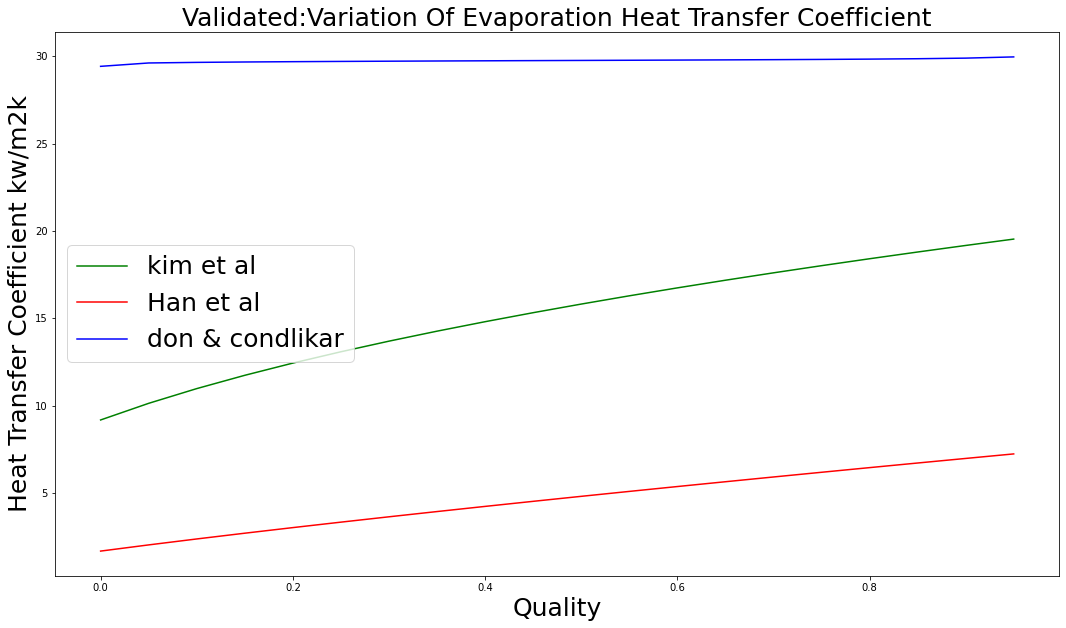

In [14]:
#EVAPORATER HEAT TRANSFER COEFFICIENT
#1.kim et al
hev_kim=(5.323*(kle/dh)*(Reeqe**0.42)*(prle**0.333))/5000
#2.Han et al
Ge1=2.81*((pco/dh)**-.041)*((pco/dh)**-2.83)
Ge2=0.746*((pco/dh)**-0.082)*((pco/dh)**0.61)
Q=(mt*LHE)
q=Q/(deq*we)
Boeq=(q)/(Geqe*LHE)
hev_Han=(Ge1*(kle/dh)*((Reeqe**(0.95*Ge2))*(Boeq**0.5)*(prle**0.4)))/50000000

#3.Donowski and kandlikar
q=(mt*LHE)/(b*we)
Bo=q/(G*LHE)
Relo=(G*dh)/vle
Nurlo=0.2875*(Relo**.78)*(prle**0.3)
hev_Don=((1.184*(Co**-.3)+225.5*(Bo**2.8))*(((1-x)**0.003)*(kle/dh)*Nurlo))/2100000


#4.Amalfi et al
Bd=((dle-dge)*g*dh**2)/(s_tension)
hev_Ampl=(18.495*(kle/dh)*((kle/dh)**0.248)*((kle/dh)**0.135)*((kle/dh)**0.351)*((kle/dh)**0.223)*((Bd)**0.235)*(Bo**0.198))/1000

data={ ' quality  ': x,'kim et al':hev_kim,'han et al':hev_Han,'don & condlikar':hev_Don,'Amalfi':hev_Ampl}
df=pd.DataFrame(data=data)
print(df)
plt.figure(figsize=(18,10))
plt.title('Validated:Variation Of Evaporation Heat Transfer Coefficient',{'size':25})
plt.xlabel('Quality',{'size':25})
plt.ylabel('Heat Transfer Coefficient kw/m2k',{'size':25})
    
plt.plot(x,hev_kim,'g-',label='kim et al')
plt.plot(x,hev_Han,'r-',label='Han et al')
plt.plot(x,hev_Don,'b-',label='don & condlikar')
#plt.plot(x,hev_Ampl,'m-',label='Amalfi')

plt.legend(fontsize='25')





In [15]:
#AREA OF EVAPORATER
#1. EXHAUST SIDE HEAT TRANSFER COEFFICIENT
x=0.1
prex=(vex*cex)/kex
Gex=(mex)/(b*we)
Reex=(Gex*deq)/vex
fex=(1.82*math.log(Reex)-1.64)**-2
Nuex=((fex/8)*Reex*prex)/((12.7*((fex/8)**0.5)*((prex**0.6777)-1))+1.07)
hex=(Nuex*kex)/deq

#OVERALL HEAT TRANSFER COEFFICIENT
U=((1/hex)+(1/(hev_Han*1000))+0.0004)**-1

#LMTD
LMTD=((T10-T8)-(T11-T7))/(math.log((T10-T8)/(T11-T7)))
print(LMTD)
#HEAT TRANSFER
Q=mt*LHE

#AREA
A_EVA=(Q)/(LMTD*U)

print(A_EVA)



55.530443047540565
[132.57994584 119.7848443  111.07179907 104.72164676  99.86912074
  96.02908291  92.90746787  90.31516978  88.12479506  86.24724237
  84.61823371  83.1901784   81.92705256  80.80106285  79.79040673
  78.87772953  78.04903716  77.29291431  76.59995217  75.96232289]


In [16]:
#AREA OF PREHEATER
##1 liquid side heat transfer coefficient
Rel=(G*deq)/vle
Tw=((T7+T6)+(T11+T12))/4
vw=cool('Toluene',0,0,0,'V','T',Tw,'Q',0)
Nul=(0.0154*B*a+0.1298)*(Rel**(0.1892*B*a+0.6398))*(prle**0.35)*((vle/vw)**0.14)
h_pre=(Nul*kle)/(deq*1000)
##exhaust side heat transfer coefficient=hex

##overall heat transfer coefficient
U=((1/hex)+(1/h_pre)+0.00072)**-1
#heat transfer
Q=mex*cex*(T11-T12)

##LMTD
LMTD=((T11-T7)-(T12-T6))/(math.log((T11-T7)/(T12-T6)))

##AREA OF PREHEATER

A_PRE=(Q)/(U*LMTD)
print('A_PRE',A_PRE)


A_PRE 68.39397185966943


In [17]:
##Area of superheater
##HEAT TRANSFER COEFFICIENT  OF TOELENE
Tw=((T1+T8)+(T9+T10))/4
vw=cool('Toluene',0,0,0,'Prandtl','T',Tw,'P',P7)
Reg=(G*deq)/vge
Reex=(G*deq)/vge
f0=(1.8*math.log(Reg)-1.5)**-2
f1=39/(Reg**0.289)
p=math.sin(B*a)
q=(0.18*math.tan(B*a)+(0.36*math.sin(B*a))+(f0/p))**0.5
r=(1-p)/(3.8*f1)**.5
s=(p/q)+r
f=(1/s)**2
Nug=0.122*(prge**0.333)*((vge/vw)**(1/6))*(f*(Reg**2)*math.sin(2*B))**0.374
h_sup=(Nug*kge)/(deq*5)
## EXHAUST HEAT TRANSFER hex

##LMTD
LMTD=((T9-T1)-(T10-T8))/(math.log((T9-T1)/(T10-T8)))

#OVERALL HEAT TRANSFER COEFFICIENR
U=((1/h_sup)+(1/hex)+0.00072)**-1

##heat transfer 
Q=mex*cex*(T9-T10)

##AREA
A_SUP=Q/(U*LMTD)

print('A_SUP',A_SUP)


A_SUP 67.66794239796411


Area [68.39397185966943, 132.57994583894472, 67.66794239796411, 234.33083829389645]


<BarContainer object of 4 artists>

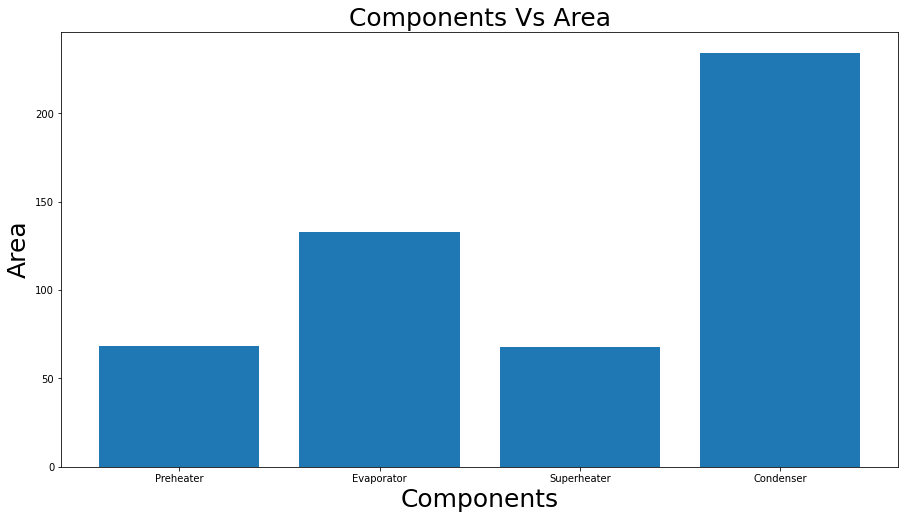

In [18]:

componant=['Preheater','Evaporator','Superheater','Condenser']
area=[A_PRE,A_EVA[0],A_SUP,A_cond[0]]
print("Area",area)
ypos=np.arange(len(componant))
plt.figure(figsize=(15,8))
plt.xlabel('Components',{'size':25})
plt.ylabel('Area',{'size':25})
plt.title('Components Vs Area',{'size':25})
plt.xticks(ypos,componant)
plt.bar(ypos,area)

     quality    Tsup=543K  Tsup=513K  Tsup=483K
0         0.00   9.191395   9.574370   9.378974
1         0.05  10.143311  10.565949  10.350317
2         0.10  10.985504  11.443233  11.209698
3         0.15  11.746809  12.236260  11.986540
4         0.20  12.445427  12.963986  12.699415
5         0.25  13.093692  13.639263  13.360910
6         0.30  13.700412  14.271262  13.980012
7         0.35  14.272125  14.866797  14.563393
8         0.40  14.813840  15.431084  15.116164
9         0.45  15.329494  15.968223  15.642341
10        0.50  15.822241  16.481501  16.145144
11        0.55  16.294659  16.973603  16.627203
12        0.60  16.748881  17.446751  17.090695
13        0.65  17.186699  17.902811  17.537448
14        0.70  17.609632  18.343367  17.969012
15        0.75  18.018984  18.769775  18.386718
16        0.80  18.415879  19.183208  18.791714
17        0.85  18.801301  19.584688  19.185001
18        0.90  19.176109  19.975113  19.567458
19        0.95  19.541063  20.355274  19

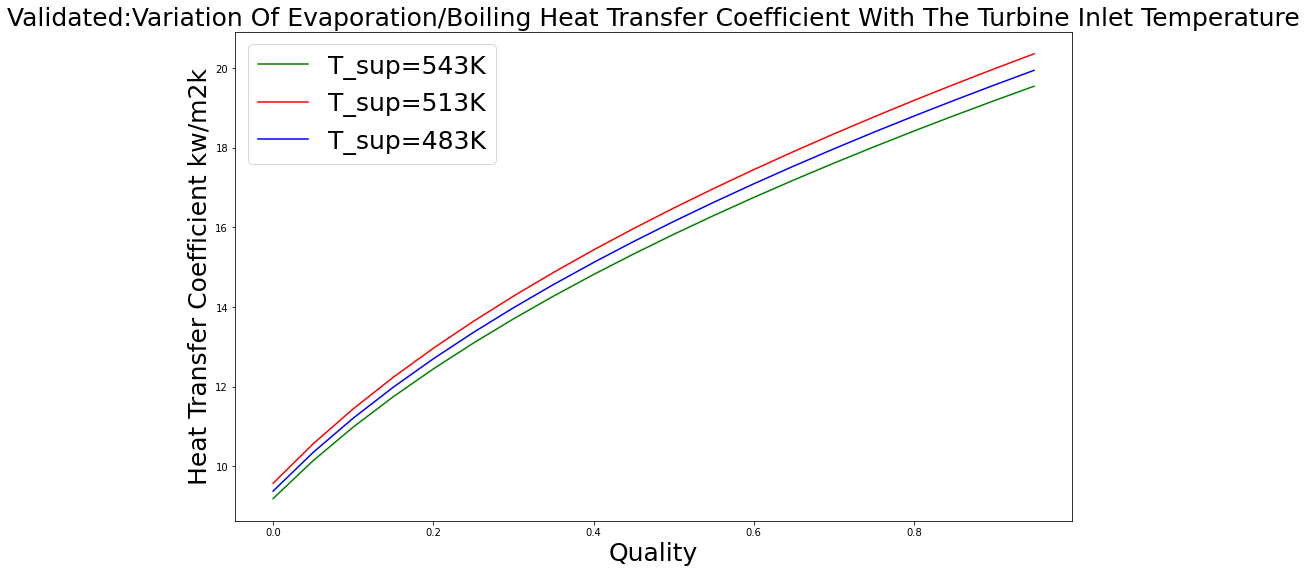

In [19]:
#EVAPORATER HEAT TRANSFER COEFFICIENT with variation in inlet turbine temperature
#1.kim et al Tsup=543K
T1=513
S1=cool('Toluene',0,0,0,'S','T',T1,'P',P7)
S2=S1
P2=P4
T2=cool('Toluene',0,0,0,'T','S',S1,'P',P2)
win=(1/dlc)*(P7-P4)
h5=hlc+win
T5=cool('Toluene',0,0,0,'T','H',h5,'P',P7)
T6=T5+(cge/cle)*(T2-T3)
#mass flow rate of touelene
mt=(mex*cex*(T9-T11))/(cge*(T1-T8)+LHE)
#EQUIVALENT PROPERTIES OF EVAPORATER
x=0
for x in [np.arange(x,1,0.05)]:
    Geqe=G*((1-x)+x*((dle/dge)**0.5))
    Reeqe=(Geqe*dh)/vle
hev_kim=(5.323*(kle/dh)*(Reeqe**0.42)*(prle**0.333))/5000

#Tsup=513K
T1=513
S1=cool('Toluene',0,0,0,'S','T',T1,'P',P7)
S2=S1
P2=P4
T2=cool('Toluene',0,0,0,'T','S',S1,'P',P2)
win=(1/dlc)*(P7-P4)
h5=hlc+win
T5=cool('Toluene',0,0,0,'T','H',h5,'P',P7)
T6=T5+(cge/cle)*(T2-T3)
#mass flow rate of touelene
mt=(mex*cex*(T9-T11))/(cge*(T1-T8)+LHE)
#print('mt',mt)
#T12=T11-((mt*cle)/(mex*cex))*(T7-T6)
#T10=((mt*LHE)/(mex*cex))+T11
#EQUIVALENT PROPERTIES OF EVAPORATER
x=0
for x in [np.arange(x,1,0.05)]:
    Geqe=G*((1-x)+x*((dle/dge)**0.5))
    Reeqe=(Geqe*dh)/vle
hev_kim2=(5.323*(kle/dh)*(Reeqe**0.42)*(prle**0.333))/4800

#Tsup=483K
T1=483
S1=cool('Toluene',0,0,0,'S','T',T1,'P',P7)
S2=S1
P2=P4
T2=cool('Toluene',0,0,0,'T','S',S1,'P',P2)
win=(1/dlc)*(P7-P4)
h5=hlc+win
T5=cool('Toluene',0,0,0,'T','H',h5,'P',P7)
T6=T5+(cge/cle)*(T2-T3)
#mass flow rate of touelene
mt=(mex*cex*(T9-T11))/(cge*(T1-T8)+LHE)
#EQUIVALENT PROPERTIES OF EVAPORATER
x=0
for x in [np.arange(x,1,0.05)]:
    Geqe=G*((1-x)+x*((dle/dge)**0.5))
    Reeqe=(Geqe*dh)/vle
hev_kim3=(5.323*(kle/dh)*(Reeqe**0.42)*(prle**0.333))/4900

data={ ' quality  ': x,'Tsup=543K':hev_kim,'Tsup=513K':hev_kim2,'Tsup=483K':hev_kim3}
df=pd.DataFrame(data=data)
print(df)
plt.figure(figsize=(15,9))
plt.title('Validated:Variation Of Evaporation/Boiling Heat Transfer Coefficient With The Turbine Inlet Temperature',{'size':25})
plt.xlabel('Quality',{'size':25})
plt.ylabel('Heat Transfer Coefficient kw/m2k',{'size':25})
    
plt.plot(x,hev_kim,'g-',label='T_sup=543K')
plt.plot(x,hev_kim2,'r-',label='T_sup=513K')
plt.plot(x,hev_kim3,'b-',label='T_sup=483K')

plt.legend(fontsize='25')


Q_evap [9.235232612627769, 7.911249255765756, 6.919285233352928]


(1.0, 16.0)

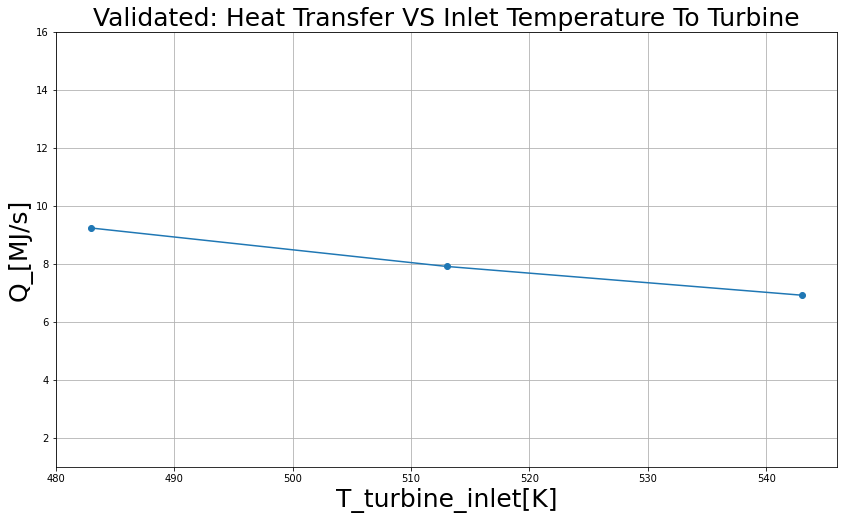

In [20]:
#Variation of Heat flux in Evaporator with turbine inlet temperature

hf=PropsSI("H","T",T7,"Q",0,"Toluene")
hg=PropsSI("H","T",T7,"Q",1,"Toluene")
hfg_evap=hg-hf
T1=[483,513,543]
M=[]
Q=[]
for i in [0,1,2]:
    m_b=(mex*cex*(T9-T11))/(cge*(T1[i]-T8)+hfg_evap)
    M.append(m_b)
    Q_evap=M[i]*hfg_evap/10e5
    Q.append(Q_evap)
print("Q_evap",Q)
plt.figure(figsize=(14,8))
plt.title('Validated: Heat Transfer VS Inlet Temperature To Turbine',{'size':25})
plt.plot(T1,Q,marker = 'o')
plt.ylabel('Q_[MJ/s]',{'size':25})
plt.xlabel('T_turbine_inlet[K]',{'size':25})
plt.grid(True)
plt.ylim((1,16))